In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_style("ticks")
%matplotlib inline

In [2]:
bcdr_d01 = pd.read_csv('../data/messy/bcdr_d01_features.csv')
bcdr_d01.head()

,patient_id,study_id,series,lesion_id,segmentation_id,image_view,mammography_type,mammography_nodule,mammography_calcification,mammography_microcalcification,...,t_homo,t_savgh,t_svarh,t_senth,t_entro,t_dvarh,t_denth,t_inf1h,t_inf2h,classification
0,3,4,1,7,10,2,1,1,0,0,...,0.52281,55.3474,2771.1561,3.0068,4.3143,3.9515,1.5656,-0.190550,0.77071,Malign
1,3,4,1,7,11,4,1,1,0,0,...,0.46888,54.2754,2654.1706,3.1893,4.7304,6.7713,1.8039,-0.149960,0.72962,Malign
2,4,8,1,9,14,4,1,1,1,0,...,0.48007,36.5319,1166.2156,2.5313,4.0464,5.9552,1.7124,-0.028458,0.32486,Benign
3,4,8,1,9,15,2,1,1,1,0,...,0.43897,48.3651,2081.4079,3.0147,4.6922,7.3839,1.8264,-0.081846,0.57253,Benign
4,5,10,1,11,18,2,1,1,0,0,...,0.44106,38.5474,1306.9212,2.5311,4.2309,7.7829,1.8325,-0.024156,0.27899,Benign


In [3]:
bcdr_d02 = pd.read_csv('../data/messy/bcdr_d02_features.csv')
bcdr_d02.head()

,patient_id,study_id,series,lesion_id,segmentation_id,image_view,mammography_type,mammography_nodule,mammography_calcification,mammography_microcalcification,...,t_homo,t_savgh,t_svarh,t_senth,t_entro,t_dvarh,t_denth,t_inf1h,t_inf2h,classification
0,2,3,1,5,6,4,1,0,1,0,...,0.37143,54.1492,2662.4732,2.6950,4.34150,14.9935,2.13670,-0.050623,0.44845,Benign
1,2,3,1,5,7,2,1,0,1,0,...,0.38186,57.8790,3071.1647,2.6133,3.93910,20.0630,2.22450,-0.052866,0.43563,Benign
2,2,3,1,6,8,3,1,0,1,0,...,0.54930,59.6439,3320.0736,2.2776,2.94620,36.8709,2.19570,-0.075392,0.44985,Benign
3,2,3,1,6,9,1,1,0,1,0,...,0.57982,60.7882,3457.9421,2.1277,2.77310,17.4251,1.96920,-0.062953,0.40322,Benign
4,4,7,1,8,12,4,1,0,1,0,...,0.87301,63.0109,3877.8254,0.7949,0.91448,6.7711,0.78574,-0.062137,0.22887,Benign


In [4]:
frames = [bcdr_d01, bcdr_d02]
bcdr_d0G = pd.concat(frames)

In [5]:
#bcdr_d0G = bcdr_d0G.drop(columns=['density'])
#bcdr_d0G = bcdr_d0G.dropna()

In [6]:
bcdr_d0G.isnull().mean()

patient_id                              0.000000
study_id                                0.000000
series                                  0.000000
lesion_id                               0.000000
segmentation_id                         0.000000
image_view                              0.000000
mammography_type                        0.000000
mammography_nodule                      0.000000
mammography_calcification               0.000000
mammography_microcalcification          0.000000
mammography_axillary_adenopathy         0.000000
mammography_architectural_distortion    0.000000
mammography_stroma_distortion           0.000000
age                                     0.000000
density                                 0.088629
i_mean                                  0.000000
i_std_dev                               0.000000
i_maximum                               0.000000
i_minimum                               0.000000
i_kurtosis                              0.000000
i_skewness          

In [7]:
target_count = bcdr_d0G.classification.value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Proportion: 4.59 : 1


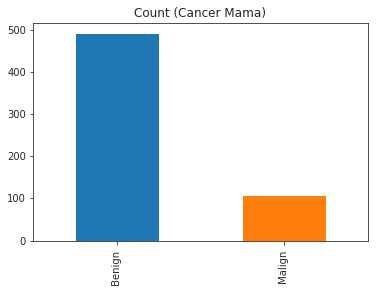

In [8]:
target_count.plot(kind='bar', title='Count (Cancer Mama)');

## Random under-sampling

In [9]:
bcdr_d0G['classification'] = bcdr_d0G['classification'].astype(str)
bcdr_d0G['diagnosis'] = [1 if x.strip() == 'Malign' else 0 for x in bcdr_d0G['classification']] 

Random under-sampling:
1    107
0    107
Name: diagnosis, dtype: int64


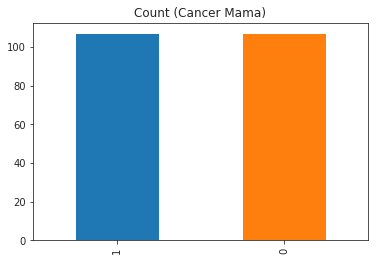

In [10]:
count_class_0, count_class_1 = bcdr_d0G.classification.value_counts()

# Divide by class
df_class_0 = bcdr_d0G[bcdr_d0G['diagnosis'] == 0]
df_class_1 = bcdr_d0G[bcdr_d0G['diagnosis'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.diagnosis.value_counts())

df_test_under.diagnosis.value_counts().plot(kind='bar', title='Count (Cancer Mama)');

In [11]:
df_test_under.head()

,patient_id,study_id,series,lesion_id,segmentation_id,image_view,mammography_type,mammography_nodule,mammography_calcification,mammography_microcalcification,...,t_savgh,t_svarh,t_senth,t_entro,t_dvarh,t_denth,t_inf1h,t_inf2h,classification,diagnosis
249,135,181,1,217,427,4,1,0,0,1,...,46.4964,1927.4209,2.8424,4.6481,22.6855,2.2788,-0.067791,0.52168,Benign,0
145,475,671,1,139,267,1,1,0,1,0,...,55.8337,2831.3071,2.8836,4.4609,32.2467,2.4545,-0.118360,0.65078,Benign,0
333,149,202,1,284,562,1,1,0,1,0,...,48.4120,2098.1501,3.1812,4.8637,29.2332,2.4093,-0.108290,0.63626,Benign,0
75,33,46,1,73,139,4,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,0
26,508,727,1,42,74,1,1,0,1,0,...,36.6570,1165.0225,2.7682,4.5422,10.0407,1.9383,-0.053347,0.45708,Benign,0


In [12]:
df_test_under = df_test_under.drop(columns=[
    'patient_id', 'study_id','series',
    'lesion_id',  'segmentation_id',   'mammography_type', 
    'mammography_axillary_adenopathy', 'classification'])
df_test_under.to_csv('../data/clean/df_test_under.csv', index=False)

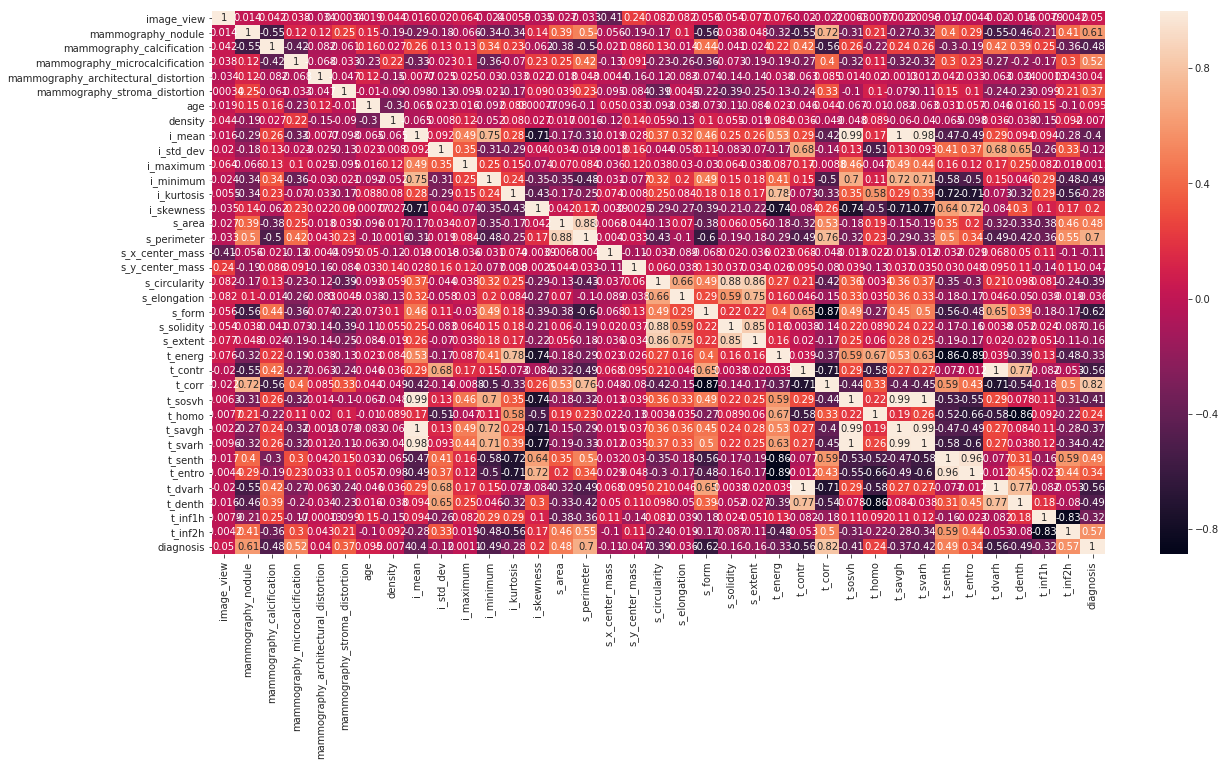

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_test_under.corr(), annot=True)

In [14]:
data = df_test_under

# Correlation metrics
label_encoder = LabelEncoder()
data.iloc[:,data.shape[1] - 1] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
corr = data.corr()
#sns.heatmap(corr)


# Next, we compare the correlation between features 
# and remove one of two features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

# pvalue feature selection
selected_columns = selected_columns[1:].values

import statsmodels.formula.api as sm

def backward_elimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backward_elimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)


# Moving the result to a new Dataframe
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

# Creating a Dataframe with the columns selected using the p-value and correlation
fs_data = pd.DataFrame(data = data_modeled, columns = selected_columns)

MissingDataError: exog contains inf or nans

In [ ]:
fs_data.head()

In [ ]:
results = sm.OLS(df_test_under.diagnosis, df_test_under.drop(columns=['diagnosis'])).fit()
print(results.summary())